📊 Projeto: Análise Exploratória de Vendas - E-commerce
# Autora: Pamela Silveira da Silva
# Objetivo: Entender padrões de vendas, produtos mais vendidos e receita por país/mês

1️⃣ Importação das bibliotecas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Configuração visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

2️⃣ Carregamento do dataset

In [ ]:
# Usando o parametro encoding="latin1" para evitar erros com acentos
df = pd.read_csv("data.csv", encoding="latin1")

In [17]:
# Visualizar as primeiras linhas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


3️⃣ Entendimento da base

In [ ]:
df.info()       # Tipos de dados e quantidade de registros
df.describe()   # Estatísticas descritivas
df.isnull().sum()  # Verificar valores nulos

4️⃣ Limpeza básica dos dados

In [ ]:
# Remover linhas sem InvoiceNo ou Description
df = df.dropna(subset=["InvoiceNo", "Description"])

# Remover quantidades negativas (devoluções)
df = df[df["Quantity"] > 0]

# Criar coluna de valor total
df["Total"] = df["Quantity"] * df["UnitPrice"]

df.info()  # Conferir limpeza

5️⃣ Análises e gráficos


🔹 Top 10 produtos mais vendidos

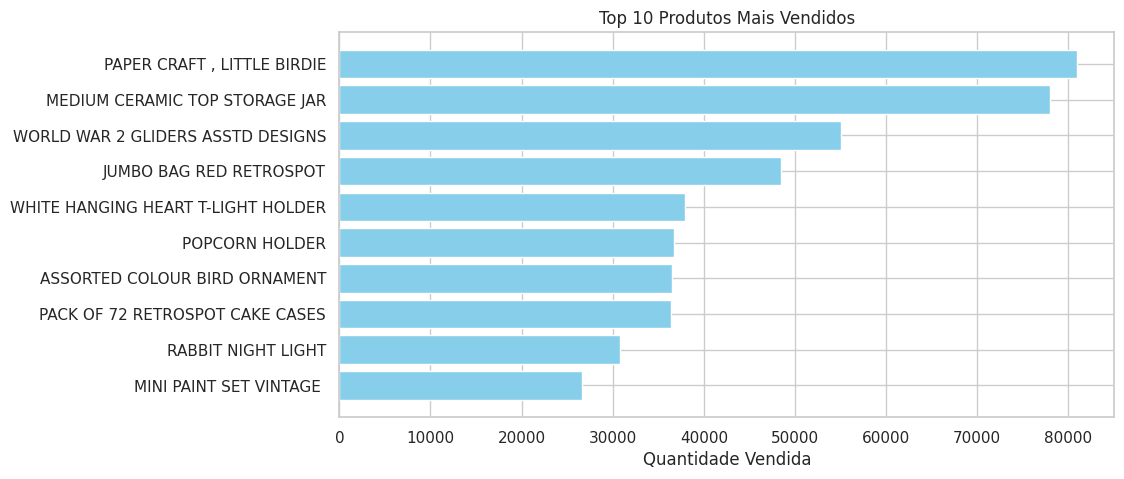

In [23]:
top_produtos = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.barh(top_produtos.index[::-1], top_produtos.values[::-1], color="skyblue")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.savefig("top_produtos.png")
plt.show()

🔹 Receita total por país

/tmp/ipython-input-855964991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receita_pais.values, y=receita_pais.index, palette="viridis")


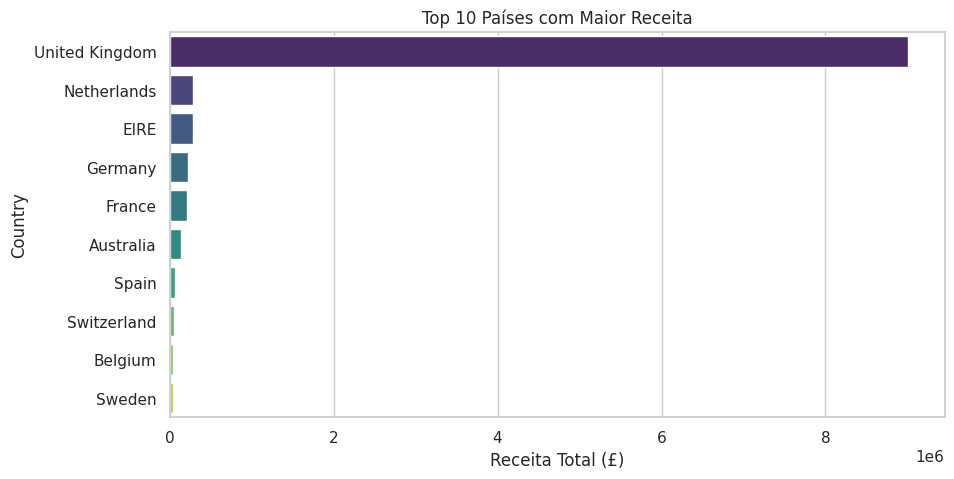

In [24]:
receita_pais = df.groupby("Country")["Total"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=receita_pais.values, y=receita_pais.index, palette="viridis")
plt.title("Top 10 Países com Maior Receita")
plt.xlabel("Receita Total (£)")
plt.savefig("receita_pais.png")
plt.show()

🔹 Receita por mês (se tiver coluna InvoiceDate)

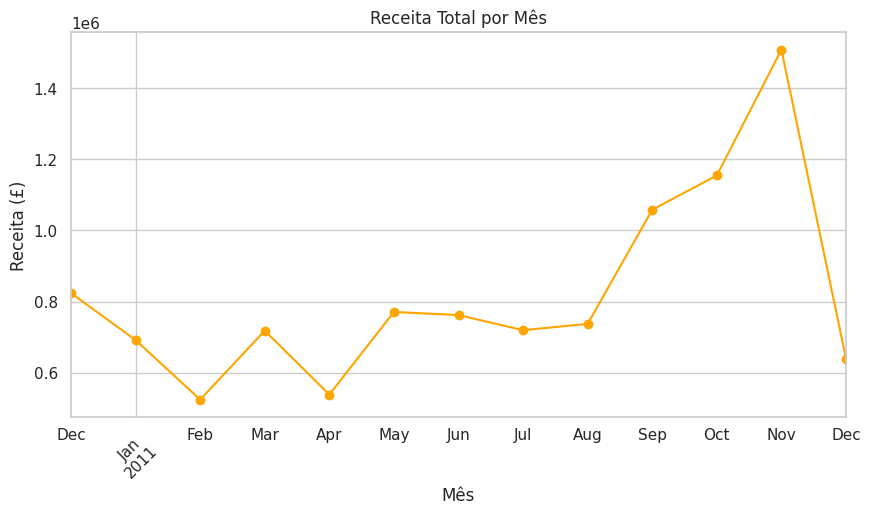

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

receita_mes = df.groupby("Month")["Total"].sum()
receita_mes.plot(kind='line', marker='o', color='orange')
plt.title("Receita Total por Mês")
plt.ylabel("Receita (£)")
plt.xlabel("Mês")
plt.xticks(rotation=45)
plt.savefig("receita_mes.png")
plt.show()

6️⃣ Insights principais

💡 Produtos de decoração e presentes estão entre os mais vendidos
# 💡 O Reino Unido concentra a maior parte das vendas
# 💡 Receita aumenta consistentemente em alguns meses
# 💡 Produtos com alta quantidade vendida nem sempre têm alto ticket
